# *YOLOV5 CAR PLATE DETECTION*

In [2]:
!nvidia-smi

Sun Feb 26 15:40:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split
import tqdm
import yaml
import torch
from IPython.display import Image

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

**START CLONING YOLOV5**

In [5]:
!git clone https://github.com/ultralytics/yolov5.git  

Cloning into 'yolov5'...
remote: Enumerating objects: 15274, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 15274 (delta 11), reused 24 (delta 6), pack-reused 15236
Receiving objects: 100% (15274/15274), 14.23 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (10465/10465), done.


In [6]:
cd yolov5


/content/yolov5


In [7]:
ls

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [8]:
%pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.4.0 which is incompatible.


In [9]:
# base dir has to be located with yolov5 in the same  directory!
base_dir = 'base_dir'

os.mkdir(base_dir)


In [10]:
cd base_dir

/content/yolov5/base_dir


In [11]:
images = os.path.join(base_dir, 'images')
os.mkdir('images')

In [12]:
cd base_dir

[Errno 2] No such file or directory: 'base_dir'
/content/yolov5/base_dir


In [13]:
images='/content/yolov5/base_dir/images'

***create train and validation directory in the folder images***

In [14]:
train = os.path.join(images, 'train')
isexist=(os.path.exists(train))
if (not isexist):
  print(isexist)
  os.mkdir(train)

False


In [15]:
validation = os.path.join(images, 'validation')
os.mkdir(validation)

In [16]:
!pip install tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 9.6 MB/s eta 0:00:00
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7858 sha256=de43c440252baccb241854a4ec22c8cf8ca24bedbda2c3ab304e719800db5d6e
  Stored in directory: /root/.cache/pip/wheels/74/04/0b/a001c55dfd026a1231c74a4cdad4929c144352c4d8d744ad89
Successfully built tree


In [19]:
!tree base_dir

/bin/bash: tree: command not found


In [20]:
!python3 -m pip install --upgrade setuptools pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [21]:
!python3 -m pip install nvidia-pyindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-pyindex: filename=nvidia_pyindex-1.0.9-py3-none-any.whl size=8418 sha256=e76d1c866ffb287a067682dc43ac9b8be5dedbe3d422aba62b9d697ac146d267
  Stored in directory: /root/.cache/pip/wheels/e0/c2/fb/5cf4e1cfaf28007238362cb746fb38fc2dd76348331a748d54
Successfully built nvidia-pyindex


In [22]:

!python3 -m pip install --upgrade nvidia-tensorrt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.5/549.5 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.1/333.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.3/719.3 MB 2.4 MB/s eta 0:00:00
  Created wheel for nvidia-cublas-cu11: filename=nvidia_cublas_cu11-2022.4.8-py3-none-any.whl size=15604 sha256=3c128127c5fd2c8601ca9ab0c9f136bfdeaba64fcfaab05a7a46ac8ca0ac50a6
  Stored in directory: /root/.cache/pip/wheels/e2/f7/1a/4c0333c9af22a717611a0e25b918d90b9e8ddcdd682980cc60
  Created wheel for nvidia-cuda-runtime-cu11: filename=nvidia_cuda_runtime_cu11-2022.4.25-py3-none-any.whl size=15677 sha256=a8f825c98947df4e

In [23]:
import tensorrt

In [24]:
print(tensorrt.__version__)

8.5.3.1


In [26]:
assert tensorrt.Builder(tensorrt.Logger())

In [30]:
!python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com


In [31]:
import xml.etree.ElementTree as ET
import os
from tqdm import tqdm
import pandas as pd
import zipfile

In [82]:
dataset = zipfile.ZipFile("/content/archive.zip")
dataset.extractall()
dataset.close()

In [83]:
input_path = "/content/yolov5/"
annotation_path = os.path.join(input_path, "annotations")

In [35]:
annotations = os.listdir(annotation_path)

In [37]:
img_names_list=[]
width_list=[]
height_list = []
label_list=[]
xmin_list=[]
xmax_list=[]
ymin_list=[]
ymax_list=[]
for idx in tqdm(range(len(annotations))):
  tree=ET.parse(os.path.join(annotation_path,annotations[idx]))
  root = tree.getroot()

  img_name = root.find('filename').text
  size=root.find('size')

  width = size.find('width').text
  height= size.find('height').text


  for group in root.findall('object'):
    label = group.find('name').text
    bbox = group.find('bndbox')
    xmin = bbox.find('xmin').text
    ymin = bbox.find('ymin').text
    xmax = bbox.find('xmax').text
    ymax = bbox.find('ymax').text

    img_names_list.append(img_name)
    width_list.append(width)
    height_list.append(height)
    xmin_list.append(xmin)
    xmax_list.append(xmax)
    ymin_list.append(ymin)
    ymax_list.append(ymax)
    label_list.append(label)

100%|██████████| 433/433 [00:00<00:00, 19498.34it/s]


In [38]:
labels_df = pd.DataFrame({
    'img_name':img_names_list,
     'width':width_list,
     'height': height_list,
      'xmin': xmin_list,
      'ymin': ymin_list,
      'xmax': xmax_list,
      'ymax': ymax_list,
      'label': label_list})


In [39]:
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label
0,Cars257.png,400,300,167,132,241,166,licence
1,Cars204.png,500,375,193,145,279,187,licence
2,Cars335.png,399,400,156,163,221,198,licence
3,Cars234.png,400,233,160,149,246,171,licence
4,Cars286.png,500,375,201,191,288,230,licence


In [40]:
!pip install pybboxes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com


In [41]:

import numpy as np
import pandas as pd
import os
import pybboxes as pbx
from collections import defaultdict
from tqdm import tqdm
import shutil
     

In [43]:
class_names = labels_df['label'].unique().tolist()
class_names

['licence']

In [44]:
labels_df['class'] = labels_df['label'].apply(lambda x : class_names.index(x))
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label,class
0,Cars257.png,400,300,167,132,241,166,licence,0
1,Cars204.png,500,375,193,145,279,187,licence,0
2,Cars335.png,399,400,156,163,221,198,licence,0
3,Cars234.png,400,233,160,149,246,171,licence,0
4,Cars286.png,500,375,201,191,288,230,licence,0


In [50]:
img_dict = defaultdict(list)

for idx in range(len(labels_df)):
  sample_label_list = []
  img_name=labels_df.loc[idx, 'img_name']
  xmin =labels_df.loc[idx, 'xmin']
  ymin = labels_df.loc[idx, 'ymin']
  xmax = labels_df.loc[idx, 'xmax']
  ymax = labels_df.loc[idx, 'ymax']

  # class
  class_num = labels_df.loc[idx, 'class']

  W, H = int (labels_df.loc[idx, 'width']), int (labels_df.loc[idx, 'height'])

  boundingbox = (int(xmin), int(ymin), int(xmax), int(ymax))
  #convert voc label to yolo yype
  x_center, y_center, w, h = pbx.convert_bbox(boundingbox, from_type="voc", to_type="yolo", image_size=(W,H))

  
  sample_label_list.append(str(class_num))
  sample_label_list.append(str(x_center))
  sample_label_list.append(str(y_center))
  sample_label_list.append(str(w))
  sample_label_list.append(str(h))

  line = ' '.join(sample_label_list)

  img_dict[img_name].append(line)

In [84]:
labels = "/content/yolov5/annotations"
# make labels dir in data folder of yolov5




In [74]:
ls "/content/yolov5/annotations/"

In [85]:
#generate txt file for each image
for img_name, lines in img_dict.items():
  img_name = img_name.split('.')[0]
  with open(f'{labels}/{img_name}.txt', 'w') as f:
    for line in  lines:
      f.write(line)
      f.write('\n')

In [61]:
train_dir = "/content/yolov5/base_dir/images/train/"
val_dir = "/content/yolov5/base_dir/images/validation/"

In [58]:
train_image = os.path.join(train_dir, "images")
exist_train = (os.path.exists(train_image))
if (not exist_train):
  os.mkdir(train_image)

In [62]:
train_label = os.path.join(train_dir, "labels")
exist_train = (os.path.exists(train_label))
if (not exist_train):
  os.mkdir(train_image)

In [64]:
val_image = os.path.join(val_dir, "images")
exist_train = (os.path.exists(val_image))
if (not exist_train):
  os.mkdir(val_image)

In [65]:
val_label = os.path.join(val_dir, "labels")
exist_train = (os.path.exists(val_label))
if (not exist_train):
  os.mkdir(val_label)

In [67]:

import os
import shutil
from random import shuffle

In [68]:
#suffle 
images = "/content/yolov5/images"
files = os.listdir(images)
shuffle(files)

In [69]:
labels = "/content/yolov5/annotations"

In [70]:
def split(files, ratio):
  elements  = len(files)
  middle = int(elements * ratio)
  return [files[:middle], files[middle:]]

def copy_files(images_path, labels_path, destination_path, files):
    for file_name in files:
        file_name = file_name.split('.')[0]

        src = images_path + f'/{file_name}.png'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

        src = labels_path + f'/{file_name}.txt'
        dst = destination_path + '/labels'
        shutil.copy(src, dst)

In [86]:
train_ratio = 0.75
train_files, val_files = split(files, train_ratio)



copy_files(images, labels, train_dir, train_files)
copy_files(images, labels, val_dir, val_files)

In [90]:
images_path = "/content/yolov5/images"

In [92]:
assert (len(os.listdir(train_image)) + len(os.listdir(val_image)) == len(os.listdir(images_path)))

In [93]:
yaml_file = "/content/yolov5" + "sign_data.yaml"


In [95]:
with open(f'/content/yolov5/sign_data.yaml', 'w') as f:
    f.write('train: /content/yolov5/base_dir/images/train/images\n')
    f.write('val: /content/yolov5/base_dir/images/validation/images\n')
    f.write('nc: 1\n')
    f.write(f"names: {class_names}")

In [97]:
sign_data = "/content/yolov5/sign_data.yaml"

In [99]:
epochs=100
!python train.py --img 640 --batch 32 --epochs {epochs} --data {sign_data} --weights yolov5s.pt
     

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/sign_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-114-g3c0a6e6 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

In [101]:
import matplotlib.pyplot as plt
from PIL import Image

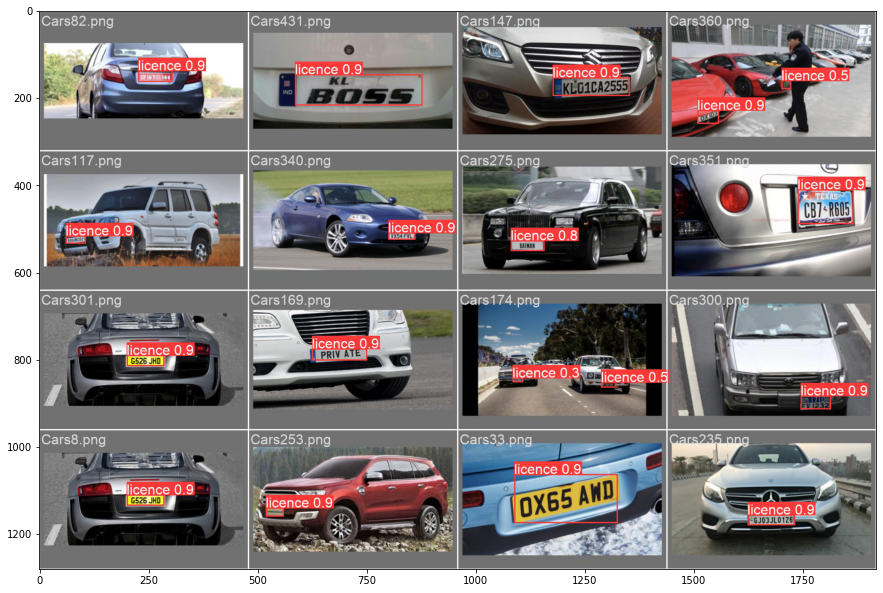

In [104]:
preds_image="/content/yolov5/runs/train/exp2/val_batch0_pred.jpg"
img = Image.open(preds_image)
plt.figure(figsize=(15,15))
plt.imshow(img)

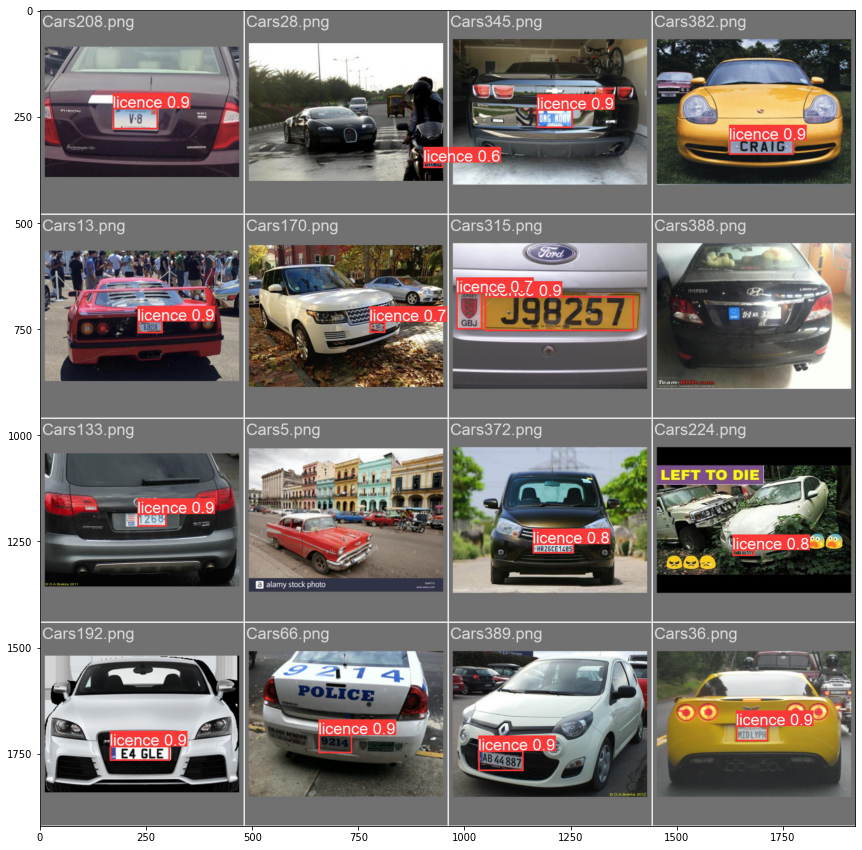

In [105]:
val_image="/content/yolov5/runs/train/exp2/val_batch1_pred.jpg"
img = Image.open(val_image)
plt.figure(figsize=(15,15))
plt.imshow(img)